In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
file_name = "10ft_3k"
real_df = pd.read_csv(f"../datasets/input_reals/{file_name}.csv", ";")
syn_df = pd.read_csv(f"../datasets/output_synt/{file_name}.csv", ",")

In [3]:
real_df

,CROSSING,FINISSHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL
0,75.0,48.0,56.0,67.0,56.0,67.0,73.0,70.0,69.0,69.0
1,75.0,35.0,58.0,71.0,32.0,48.0,54.0,43.0,61.0,72.0
2,59.0,68.0,72.0,61.0,64.0,63.0,57.0,54.0,57.0,66.0
3,60.0,55.0,81.0,78.0,50.0,57.0,58.0,48.0,77.0,74.0
4,63.0,47.0,51.0,64.0,59.0,66.0,71.0,69.0,60.0,64.0
...,...,...,...,...,...,...,...,...,...,...
2995,53.0,77.0,80.0,71.0,68.0,61.0,58.0,56.0,62.0,57.0
2996,41.0,76.0,69.0,68.0,66.0,68.0,51.0,33.0,59.0,72.0
2997,78.0,71.0,54.0,77.0,68.0,74.0,85.0,83.0,76.0,77.0
2998,32.0,31.0,67.0,52.0,45.0,56.0,67.0,54.0,52.0,59.0


In [4]:
syn_df

,CROSSING,FINISSHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL,y
0,69.973710,37.875782,70.819950,67.365845,55.843315,66.997765,35.521540,37.728386,68.236800,68.106580,0.0
1,58.357400,55.442490,73.517970,67.508766,64.414290,61.436237,48.302220,56.015194,63.736217,64.268870,0.0
2,65.604110,55.207184,66.971115,70.938545,61.050070,68.196960,45.571620,56.108414,65.343960,66.533170,0.0
3,63.409270,40.520490,67.455894,65.572520,55.373222,61.684452,48.176147,50.026882,62.378082,61.705444,0.0
4,38.993400,29.429329,76.611820,66.260290,29.885517,40.741780,34.166386,30.878240,66.488720,60.876343,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,74.451810,69.158830,76.524574,67.731750,68.550060,71.711945,51.114998,60.459503,55.543957,68.861520,1.0
2996,74.181930,53.876225,67.420190,78.108780,64.172066,74.670110,61.342255,50.954590,73.591240,72.204155,1.0
2997,68.591950,29.978052,71.554220,69.209984,29.927187,57.094833,63.202540,52.523506,63.739735,69.101760,1.0
2998,63.114840,35.694960,70.684230,59.131165,30.067348,44.098700,47.472054,37.876410,58.819836,53.653460,1.0


## Correlation Evaluation

In [5]:
real_corr, syn_corr = real_df.corr(), syn_df.corr()
diff_corr = real_corr - syn_corr

dtime = datetime.now().strftime('%Y%m%d_%H%M%S')

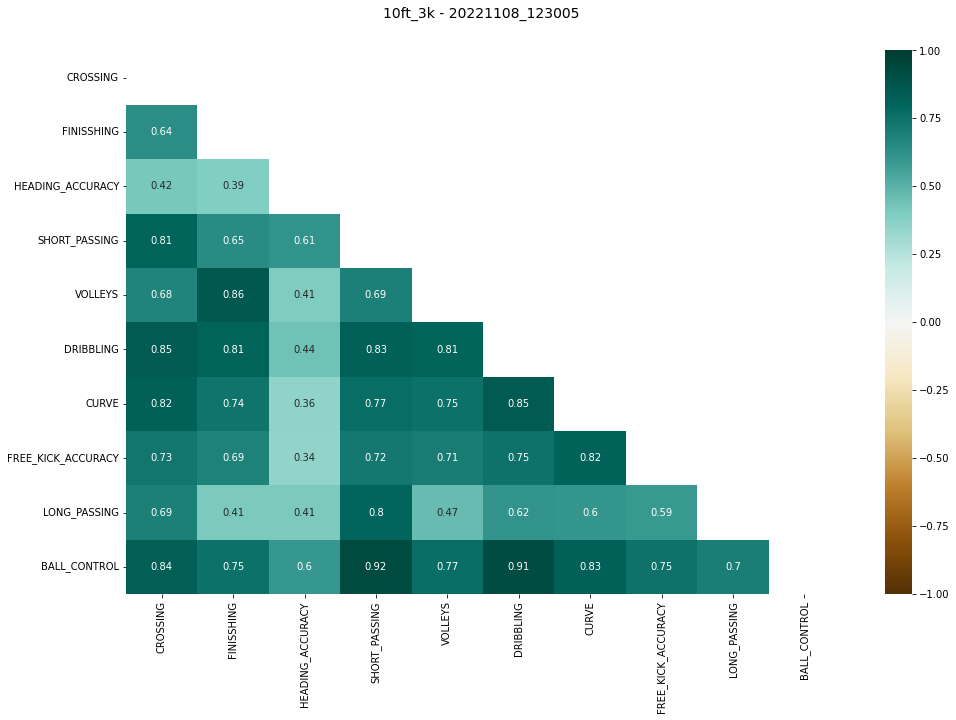

In [6]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(real_corr, dtype=np.bool))
dtime = datetime.now().strftime('%Y%m%d_%H%M%S')

heatmap = sns.heatmap(real_corr,
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')

title = "Difference of Correlations (expected as close to zero)"
png_name = f"../datasets/output_synt/" +str(file_name) + str(dtime)+ ".png"
heatmap.set_title(f"{file_name} - {dtime} \n", fontdict={"fontsize":14}, pad=16)
plt.savefig(png_name)

## CumSum Evaluation

sadece sayısal değerleri alalım

In [7]:
# real_df.info()

In [8]:
# real_df = real_df[["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]]
# syn_df = syn_df[["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]]

In [9]:
real_scaler = MinMaxScaler((0, 1))
scaled_real = pd.DataFrame(real_scaler.fit_transform(real_df))
scaled_real.columns = real_df.columns

syn_scaler = MinMaxScaler((0, 1))
scaled_syn = pd.DataFrame(syn_scaler.fit_transform(syn_df))
scaled_syn.columns = syn_df.columns

In [10]:
# scaled_real["CROSSING"].sort_values().cumsum()

In [11]:
def get_cumsum_diff(feature):
    return scaled_syn[feature].sort_values().cumsum().values - scaled_real[feature].sort_values().cumsum().values

In [12]:
def cum_sum_export(scaled_real, scaled_syn, feature):
    cumsum_diff = get_cumsum_diff(feature)
    cumsum_real = scaled_real[feature].sort_values().cumsum().values
    cumsum_syn = scaled_syn[feature].sort_values().cumsum().values

    plt.axhline(0, color="gray", alpha=.35, label="Baseline")
    plt.plot(cumsum_diff, color="gray", label="Cumulative Sum Difference")
    plt.plot(scaled_real[feature].sort_values().cumsum().values, color="red", label="Real Cumulative Sum")
    plt.plot(scaled_syn[feature].sort_values().cumsum().values, color="blue", label="Syn Cumulative Sum")
    plt.title(f"{file_name} - {feature} - {dtime}")
    plt.savefig(f"../datasets/output_synt/{file_name}_{feature}_{dtime}.png")
    plt.legend()
    plt.clf()

In [13]:
for feature in real_df.columns:
    cum_sum_export(scaled_real, scaled_syn, feature)

<Figure size 432x288 with 0 Axes>